In [127]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA
import matplotlib.pyplot as plt

Effectuer une ACP sur ces données en prenant soin d'extraire les données pertinentes pour effectuer la classification d'abord sur l'espèce (sp), puis sur le sexe (sex) et enfin en croisant espèce et sexe.

In [128]:
data = pd.read_csv("../data/crabs.csv") 

print(data[98:102])

     Unnamed: 0 sp sex  index    FL    RW    CL    CW    BD
98           99  B   F     49  17.5  16.7  38.6  44.5  17.0
99          100  B   F     50  19.2  16.5  40.9  47.9  18.1
100         101  O   M      1   9.1   6.9  16.7  18.6   7.4
101         102  O   M      2  10.2   8.2  20.2  22.2   9.0


In [129]:
# PARTIE 1: étude sur l'éspèce

In [130]:
"""separation quanti"""

quantisp = data.iloc[:,4:9].values
print(quanti1[0:5])

[[ 8.1  6.7 16.1 19.   7. ]
 [ 8.8  7.7 18.1 20.8  7.4]
 [ 9.2  7.8 19.  22.4  7.7]
 [ 9.6  7.9 20.1 23.1  8.2]
 [ 9.8  8.  20.3 23.   8.2]]


In [131]:
"""separation quali"""

qualisp = data.iloc[:,1].values
print(qualisp[0:5])

['B' 'B' 'B' 'B' 'B']


In [132]:
"""normalisation des variables quanti"""

quantisp = StandardScaler().fit_transform(quantisp)
print(quantisp[0:5])

[[-2.14623182 -2.35244988 -2.25392649 -2.2177718  -2.05798865]
 [-1.94546178 -1.96287468 -1.97228249 -1.98853816 -1.94089947]
 [-1.83073603 -1.92391716 -1.8455427  -1.78477492 -1.85308259]
 [-1.71601029 -1.88495963 -1.6906385  -1.69562851 -1.70672111]
 [-1.65864742 -1.84600211 -1.6624741  -1.70836371 -1.70672111]]


In [133]:
"""projection sur 2 axes"""

pca = sklearnPCA(n_components = 2)

In [134]:
"""Prédiction des scores des deux facteurs retenus"""

cpsp = pca.fit_transform(quantisp)

In [135]:
"""Visualisation de la matrice dans le nouveau repére"""

principaldfsp = pd.DataFrame(data = cpsp, columns = ['Axe principal 1 sp', 'Axe principal 2 sp'])
principaldfsp.head(2)

Axe principal 1 sp  Axe principal 2 sp
0            4.927573           -0.268445
1            4.386176           -0.094074

In [136]:
"""Constitution de la matrice finale avec la variable qualitative"""

finaldfsp = pd.concat([principaldfsp, data[['sp']]], axis = 1)
finaldfsp.head(2)

Axe principal 1 sp  Axe principal 2 sp sp
0            4.927573           -0.268445  B
1            4.386176           -0.094074  B

AxesSubplot(0.125,0.125;0.775x0.755)


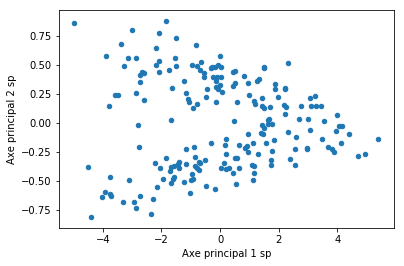

In [137]:
print(finaldfsp.plot.scatter(x='Axe principal 1 sp', y='Axe principal 2 sp'))

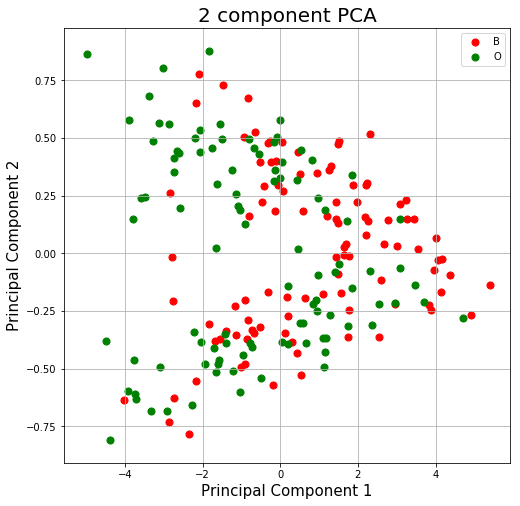

In [140]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['B', 'O']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finaldfsp['sp'] == target
    ax.scatter(finaldfsp.loc[indicesToKeep, 'Axe principal 1 sp']
               , finaldfsp.loc[indicesToKeep, 'Axe principal 2 sp']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [107]:
# PARTIE 2: étude sexe

In [142]:
"""separation quanti"""

quantisex = data.iloc[:,4:9].values
print(quantisex[0:5])

[[ 8.1  6.7 16.1 19.   7. ]
 [ 8.8  7.7 18.1 20.8  7.4]
 [ 9.2  7.8 19.  22.4  7.7]
 [ 9.6  7.9 20.1 23.1  8.2]
 [ 9.8  8.  20.3 23.   8.2]]


In [143]:
"""separation quali"""

qualisex = data.iloc[:,2].values
print(qualisex[0:5])

['M' 'M' 'M' 'M' 'M']


In [144]:
"""normalisation des variables quanti"""

quantisex = StandardScaler().fit_transform(quantisex)
print(quantisex[0:5])

[[-2.14623182 -2.35244988 -2.25392649 -2.2177718  -2.05798865]
 [-1.94546178 -1.96287468 -1.97228249 -1.98853816 -1.94089947]
 [-1.83073603 -1.92391716 -1.8455427  -1.78477492 -1.85308259]
 [-1.71601029 -1.88495963 -1.6906385  -1.69562851 -1.70672111]
 [-1.65864742 -1.84600211 -1.6624741  -1.70836371 -1.70672111]]


In [145]:
"""projection sur 2 axes"""

pca = sklearnPCA(n_components = 2)

In [146]:
"""Prédiction des scores des deux facteurs retenus"""

cpsex = pca.fit_transform(quantisex)

In [154]:
"""Visualisation de la matrice dans le nouveau repére"""

principaldfsex = pd.DataFrame(data = cpsex, columns = ['Axe principal 1 sex', 'Axe principal 2 sex'])
principaldfsex.head(2)

Axe principal 1 sex  Axe principal 2 sex
0             4.927573            -0.268445
1             4.386176            -0.094074

In [155]:
"""Constitution de la matrice finale avec la variable qualitative"""

finaldfsex = pd.concat([principaldfsex, data[['sex']]], axis = 1)
finaldfsex.head(2)

Axe principal 1 sex  Axe principal 2 sex sex
0             4.927573            -0.268445   M
1             4.386176            -0.094074   M

AxesSubplot(0.125,0.125;0.775x0.755)


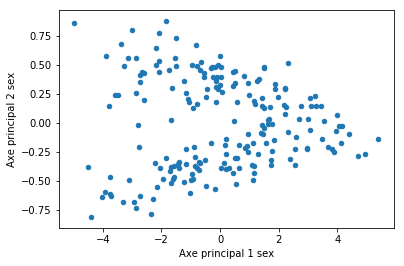

In [156]:
print(finaldfsex.plot.scatter(x='Axe principal 1 sex', y='Axe principal 2 sex'))

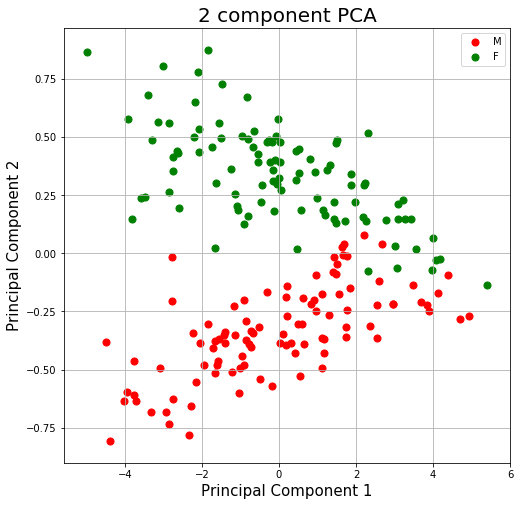

In [161]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['M', 'F']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finaldfsex['sex'] == target
    ax.scatter(finaldfsex.loc[indicesToKeep, 'Axe principal 1 sex']
               , finaldfsex.loc[indicesToKeep, 'Axe principal 2 sex']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
#PARTIE 3: étude croisée

In [53]:
"""separation quanti"""

quanti = data.iloc[:,3:9].values
print(quanti[0:5])


[[ 1.   8.1  6.7 16.1 19.   7. ]
 [ 2.   8.8  7.7 18.1 20.8  7.4]
 [ 3.   9.2  7.8 19.  22.4  7.7]
 [ 4.   9.6  7.9 20.1 23.1  8.2]
 [ 5.   9.8  8.  20.3 23.   8.2]]


In [54]:
"""separation quali"""

quali = data.iloc[:,1:3].values
print(quali[0:5])

[['B' 'M']
 ['B' 'M']
 ['B' 'M']
 ['B' 'M']
 ['B' 'M']]


In [55]:
"""normalisation des variables quanti"""

quanti = StandardScaler().fit_transform(quanti)
print(quanti[0:5])

[[-1.69774938 -2.14623182 -2.35244988 -2.25392649 -2.2177718  -2.05798865]
 [-1.62845348 -1.94546178 -1.96287468 -1.97228249 -1.98853816 -1.94089947]
 [-1.55915759 -1.83073603 -1.92391716 -1.8455427  -1.78477492 -1.85308259]
 [-1.4898617  -1.71601029 -1.88495963 -1.6906385  -1.69562851 -1.70672111]
 [-1.4205658  -1.65864742 -1.84600211 -1.6624741  -1.70836371 -1.70672111]]


In [56]:
"""projection sur 2 axes"""

pca = sklearnPCA(n_components = 2)

In [57]:
"""Prédiction des scores des deux facteurs retenus"""

principalComponents = pca.fit_transform(quanti)

In [61]:
"""Visualisation de la matrice dans le nouveau repére"""

principaldf = pd.DataFrame(data = principalComponents, columns = ['Axe principal 1', 'Axe principal 2'])
principaldf.head(2)

Axe principal 1  Axe principal 2
0         5.199105         0.341983
1         4.673593         0.209724

In [162]:
"""Constitution de la matrice finale avec la variable qualitative"""

finaldf = pd.concat([principaldf, data[['sp'],['sex']]], axis = 1)
finaldf.head(2)

TypeError: '(['sp'], ['sex'])' is an invalid key

In [66]:
print(finaldf.plot.scatter(x='Axe principal 1', y='Axe principal 2'))

AxesSubplot(0.125,0.125;0.775x0.755)
